In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
x=df.drop(['variety'],axis=1)
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x_scaled=StandardScaler().fit_transform(x)
x_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
y=df["variety"]

In [ ]:
features=x_scaled.T
cov_mat=np.cov(features)
cov_mat[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
values,vectors=np.linalg.eig(cov_mat)
print(values[:5],vectors)

[2.93808505 0.9201649  0.14774182 0.02085386] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
exp_var=[]
for i in range(len(values)):
  exp_var.append((values[i]/np.sum(values))*100)
exp_var

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]

Text(0.5, 0, 'dimnesions')

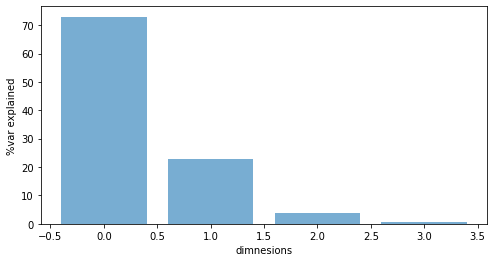

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(range(4),exp_var,alpha=0.6)
plt.ylabel("%var explained")
plt.xlabel('dimnesions')

In [ ]:
p_1=x_scaled.dot(vectors.T[0])
p_2=x_scaled.dot(vectors.T[1])
res=pd.DataFrame(p_1,columns=["pc1"])
res["pc2"]=p_2
res['y']=y
res.head()

,pc1,pc2,y
0,-2.264703,-0.480027,Setosa
1,-2.080961,0.674134,Setosa
2,-2.364229,0.341908,Setosa
3,-2.299384,0.597395,Setosa
4,-2.389842,-0.646835,Setosa


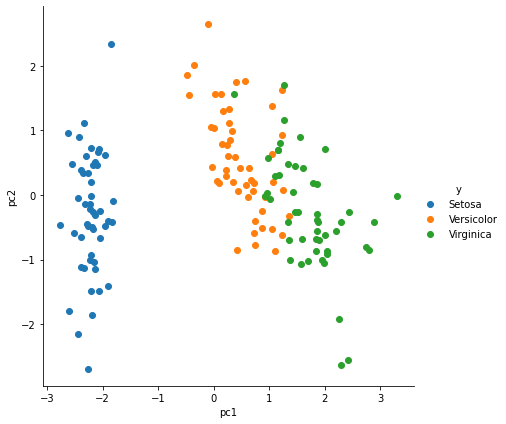

In [ ]:
sns.FacetGrid(res,hue="y",height=6).map(plt.scatter,"pc1","pc2").add_legend()
plt.show()